<a href="https://colab.research.google.com/github/Rahulraj31/Dogs_vs_Cat_Classification/blob/master/Dogs_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center>Dogs vs Cats Classification Using Transfer Learning</h1>
<br>

**Dataset Link** - https://www.kaggle.com/chetankv/dogs-cats-images






## Importing Libraries

In [ ]:
import PIL.Image as Image
import cv2
import numpy as np

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Unziping files

In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Colab Notebooks/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Making Path Object

In [ ]:
import pathlib                               
train_dir = pathlib.Path("/content/dataset/training_set")
test_dir=pathlib.Path("/content/dataset/test_set")

print(train_dir)
print(test_dir)

/content/dataset/training_set
/content/dataset/test_set


In [ ]:
list(train_dir.glob('*/*'))[:5] 

[PosixPath('/content/dataset/training_set/cats/cat.465.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat.2164.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat.2814.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat.611.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat.22.jpg')]

In [ ]:
cat_train= list(train_dir.glob('cats/*'))
len(cat_train)

4000

In [ ]:
image_count= len(list(train_dir.glob('*/*.jpg')))
image_count

8000

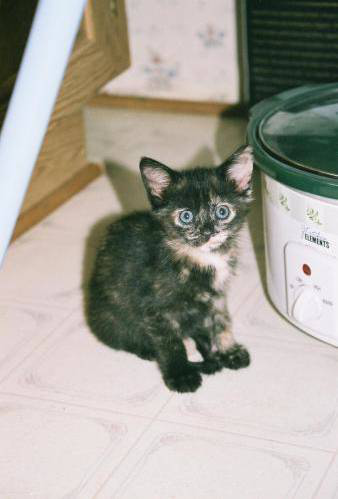

In [ ]:
Image.open(str(cat_train[1500]))

In [ ]:
dog_train= list(train_dir.glob('dogs/*'))
len(cat_train)

4000

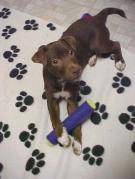

In [ ]:
Image.open(str(dog_train[1569]))

## Creating Training Dataset

**Note**- I have sliced the dataset as using whole training data was crashing my google colab and kaggle kernal. So if you have 16GB RAM and good graphic card; go for the full 

In [ ]:
images_dict = {
    'cats': cat_train[:2200],    
    'dogs': dog_train[:2200],
}

In [ ]:
images_dict["dogs"][:5]

[PosixPath('/content/dataset/training_set/dogs/dog.3856.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog.310.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog.1005.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog.3461.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog.286.jpg')]

In [ ]:
labels_dict = {
    'cats': 0,
    'dogs': 1,
    
}

In [ ]:
img= cv2.imread(str(images_dict['cats'][0]))

In [ ]:
img.shape

(374, 500, 3)

In [ ]:

X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        img=cv2.imread(str(image))
     
        resize_img=cv2.resize(img,(224,224))
       
        X.append(resize_img)
        y.append(labels_dict[name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape,y.shape

((4400, 224, 224, 3), (4400,))

## Splitting in Train - Validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30 ,random_state=0)

## Model building

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
model = Sequential([
                pretrained_model_without_top_layer,
                tf.keras.layers.Dense(2)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Scaling the image 
X_train_scaled = X_train / 255
X_val_scaled = X_val / 255

##Model training

In [ ]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
history = model.fit(X_train_scaled, y_train,validation_data=(X_val_scaled,y_val),epochs=5)

Epoch 1/5
97/97 [==============================] - 40s 76ms/step - loss: 0.1309 - acc: 0.9516 - val_loss: 0.0609 - val_acc: 0.9780
Epoch 2/5
97/97 [==============================] - 5s 56ms/step - loss: 0.0520 - acc: 0.9825 - val_loss: 0.0463 - val_acc: 0.9818
Epoch 3/5
97/97 [==============================] - 5s 56ms/step - loss: 0.0400 - acc: 0.9873 - val_loss: 0.0540 - val_acc: 0.9818
Epoch 4/5
97/97 [==============================] - 5s 56ms/step - loss: 0.0362 - acc: 0.9896 - val_loss: 0.0394 - val_acc: 0.9856
Epoch 5/5
97/97 [==============================] - 5s 56ms/step - loss: 0.0288 - acc: 0.9916 - val_loss: 0.0397 - val_acc: 0.9841


##Plotting Accuracy and Loss

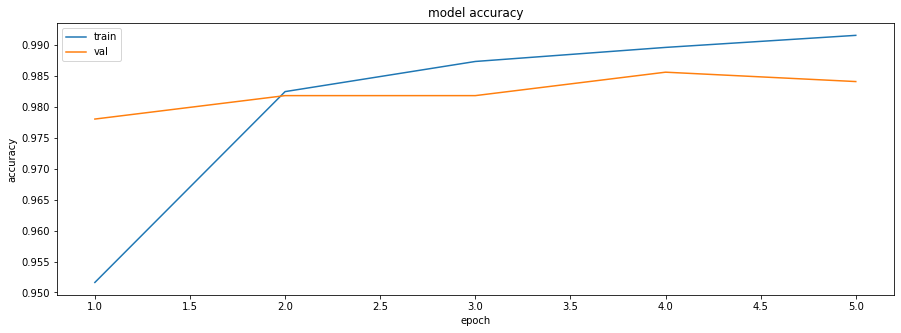

In [ ]:
plt.figure(figsize=(15,5))
epochs=range(1,len(history.history['val_acc'])+1)

plt.plot(epochs,history.history['acc'])
plt.plot(epochs,history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

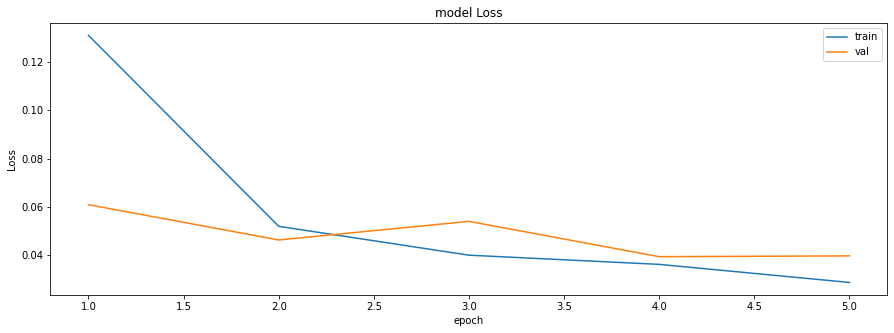

In [ ]:
plt.figure(figsize=(15,5))
epochs=range(1,len(history.history['val_loss'])+1)

plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Making Test dataset for Prediction

In [ ]:
cat_test= list(test_dir.glob('cats/*'))
dog_test= list(test_dir.glob('dogs/*'))

In [ ]:
len (dog_test)

1000

In [ ]:
test_images_dict = {
    'cats': cat_test,    
    'dogs': dog_test,
}

test_labels_dict = {
    'cats': 0,
    'dogs': 1,
    
}

In [ ]:
X_test, y_test = [], []
for name,images in test_images_dict.items():#returns key , path for each record
    for image in images:
        img=cv2.imread(str(image))
     
        resize_img=cv2.resize(img,(224,224))
       
        X_test.append(resize_img)
        y_test.append(test_labels_dict[name])

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_test.shape

(2000, 224, 224, 3)

In [ ]:
# Scaling the image 
X_test_scaled = X_test / 255

## Fitting test data to check accuracy

In [ ]:
model.evaluate(X_test_scaled,y_test)

63/63 [==============================] - 3s 45ms/step - loss: 0.0534 - acc: 0.9820


[0.05338075011968613, 0.9819999933242798]